# Real estate valuation example

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("c:\\MSC 550\\Lecture\\Week3\\Real estate.csv")
data.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Nonlinear transformation of independent variables

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(data.iloc[:,1:2])
X2 = pd.DataFrame(X2[:,1:], columns = ['X2_1','X2_2'])
X3 = np.log(data.iloc[:,2:3])
X3 = X3.rename(columns={"X3": "Log_X3"})
data = pd.concat([X2, X3, data.iloc[:,3:]], axis=1)
data

,X2_1,X2_2,Log_X3,X4,X5,X6,Y
0,32.0,1024.00,4.441225,10,24.98298,121.54024,37.9
1,19.5,380.25,5.725527,9,24.98034,121.53951,42.2
2,13.3,176.89,6.331474,5,24.98746,121.54391,47.3
3,13.3,176.89,6.331474,5,24.98746,121.54391,54.8
4,5.0,25.00,5.967603,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,13.7,187.69,8.314346,0,24.94155,121.50381,15.4
410,5.6,31.36,4.504864,9,24.97433,121.54310,50.0
411,18.8,353.44,5.968630,7,24.97923,121.53986,40.6
412,8.1,65.61,4.652150,5,24.96674,121.54067,52.5


# Identify outliers based on z-score and interquartile range.

In [13]:
data[abs(residual_norm) > 3]

,X2_1,X2_2,Log_X3,X4,X5,X6,Y
113,14.8,219.04,5.974472,6,24.96172,121.53812,7.6
148,16.4,268.96,8.237635,0,24.93293,121.51203,45.1
270,10.8,116.64,5.531737,1,24.97460,121.53046,117.5
312,35.4,1253.16,5.763714,9,24.97071,121.54069,78.0


In [15]:
Q1 = np.quantile(residual_norm, 0.25)
Q3 = np.quantile(residual_norm, 0.75)
iqr = Q3 - Q1
data[(residual_norm < Q1-1.5*iqr) | (residual_norm > Q3+1.5*iqr)]

,X2_1,X2_2,Log_X3,X4,X5,X6,Y
47,35.9,1288.81,6.462622,3,24.97563,121.53715,61.5
55,31.7,1004.89,7.056720,0,24.94968,121.53009,13.7
113,14.8,219.04,5.974472,6,24.96172,121.53812,7.6
126,38.6,1489.96,6.690457,4,24.97838,121.53477,62.9
148,16.4,268.96,8.237635,0,24.93293,121.51203,45.1
194,15.2,231.04,8.235333,0,24.93363,121.51158,29.3
220,37.2,1383.84,5.228485,9,24.97703,121.54265,78.3
251,31.7,1004.89,7.055704,0,24.94960,121.53018,13.8
270,10.8,116.64,5.531737,1,24.97460,121.53046,117.5
285,30.1,906.01,6.576879,3,24.97509,121.53644,55.3


# Exclude the outliers

In [31]:
data = data[abs(residual_norm) <= 3]

In [26]:
data = data[leverage < 2*lm.params.size/data.shape[0]]

# Train a linear regression model using OLS function from statsmodels, report the results, and conduct diagnostic check using histogram and Q-Q plot.

In [37]:
import statsmodels.api as sm
ols = sm.OLS(np.log(data.iloc[:, 6]), sm.add_constant(data.iloc[:, :6]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          2.83e-110
Time:                        13:51:26   Log-Likelihood:                 66.321
No. Observations:                 414   AIC:                            -118.6
Df Residuals:                     407   BIC:                            -90.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -593.6490    106.762     -5.560      0.0

# Calculate and identify the cases with high leverage

Text(0, 0.5, 'Leverage')

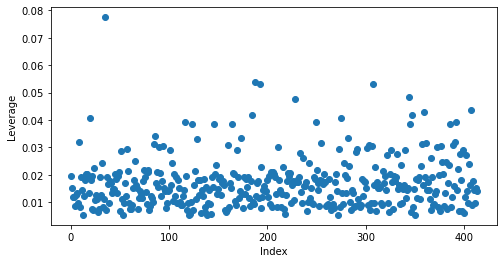

In [60]:
leverage = lm.get_influence().hat_matrix_diag
data[leverage > 2*len(lm.params)/data.shape[0]]
plt.figure(figsize=(8,4))
plt.scatter(data.index, leverage)
plt.xlabel('Index')
plt.ylabel('Leverage')

# Calculate and identify the cases with high cook's distance

Text(0, 0.5, 'Cooks distance')

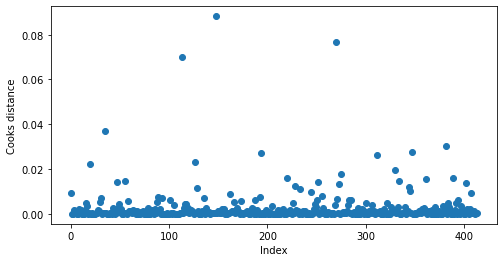

In [47]:
cooks = lm.get_influence().cooks_distance[0]
data[cooks > 1]
plt.figure(figsize=(8,4))
plt.scatter(data.index, cooks)
plt.xlabel('Index')
plt.ylabel('Cooks distance')

# Diagnostic check: residual plot

Text(0, 0.5, 'Residuals')

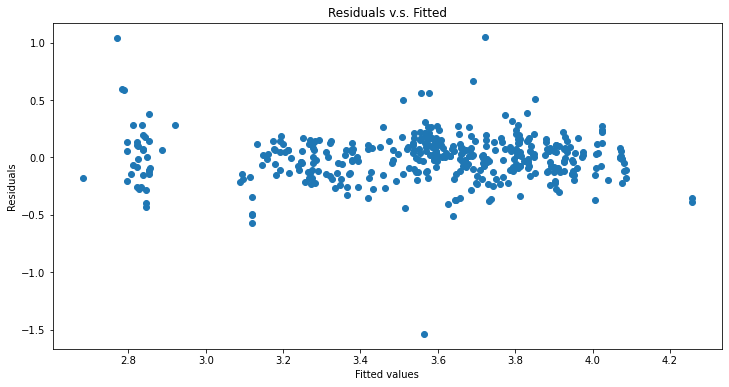

In [38]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Diagnostic check: histogram and QQ-plot

Text(0, 0.5, 'Frequency')

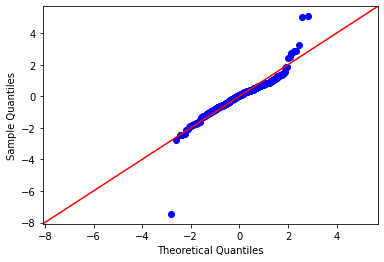

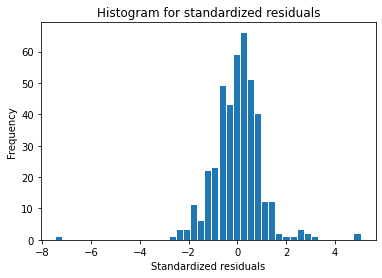

In [40]:
from sklearn.preprocessing import scale
residual = lm.resid
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(6,4))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

# Diagnostic check: residual-leverage plot

C:\Users\yt0005\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


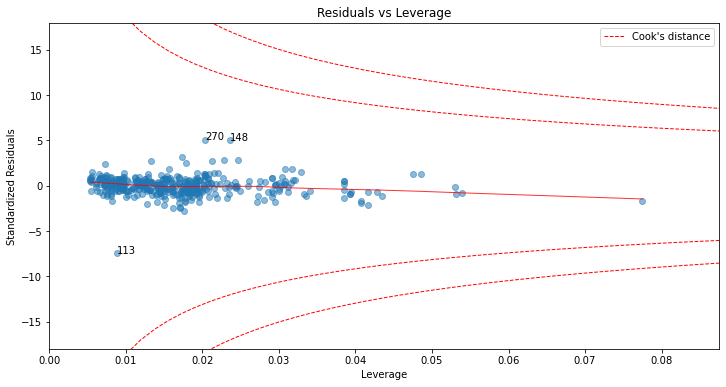

In [59]:
import seaborn as sns
leverage = lm.get_influence().hat_matrix_diag
cooks = lm.get_influence().cooks_distance[0]
plot_lm = plt.figure(figsize=(12,6))
plt.scatter(leverage, residual_norm, alpha=0.5)

# sns.regplot is used to plot a linear regression model fit.
sns.regplot(leverage, residual_norm, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
plot_lm.axes[0].set_ylim(-18, 18)
leverage_top_3 = np.flip(np.argsort(cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm.axes[0].annotate(i, xy=(leverage[i], residual_norm[i]))
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.090, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: -np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.090, 50)) # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.090, 50)) # 1 line
graph(lambda x: -np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.090, 50)) # 1 line
plt.legend(loc='upper right');